In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import cufflinks as cf
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

In [2]:
arvind = yf.download(["ARVIND.NS"], start = "2007-01-01",end = "2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
arvind.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-02,19.241365,19.462954,18.853582,19.352160,15.583809,1237858
2007-01-03,19.426023,19.499886,19.204433,19.296762,15.539202,949587
2007-01-04,19.426023,20.164656,18.853582,19.979998,16.089392,3349659
2007-01-05,20.035395,20.570902,19.758408,19.961531,16.074522,3186958
2007-01-08,19.943066,20.127724,19.426023,19.481421,15.687901,1357628


In [4]:
arvind.iplot(kind = "candle")

In [5]:
arvind.iplot(theme = "ggplot")

In [6]:
arvind_price = arvind.Close.to_frame()

In [7]:
arvind_price

,Close
Date,
2007-01-02,19.352160
2007-01-03,19.296762
2007-01-04,19.979998
2007-01-05,19.961531
2007-01-08,19.481421
...,...
2022-12-26,87.800003
2022-12-27,87.199997
2022-12-28,86.949997


In [8]:
arvind_ann_price = arvind_price.resample("A", kind = "period").last()

In [9]:
arvind_ann_price

,Close
Date,
2007,33.423100
2008,6.499962
2009,14.421790
2010,26.313766
2011,24.651846
2012,36.950069
2013,50.503967
2014,104.553368
2015,135.681824


In [10]:
arvind_ann_price["Return"] = np.log(arvind_ann_price.Close/arvind_ann_price.Close.shift())

In [11]:
arvind_ann_price.dropna(inplace= True)

In [12]:
arvind_ann_price

,Close,Return
Date,,
2008,6.499962,-1.637451
2009,14.421790,0.796944
2010,26.313766,0.601352
2011,24.651846,-0.065240
2012,36.950069,0.404716
2013,50.503967,0.312484
2014,104.553368,0.727646
2015,135.681824,0.260615
2016,133.693176,-0.014765


In [14]:
years = arvind_ann_price.index.size
years

15

In [15]:
windows = [year for year in range(years, 0, -1)]
windows

[15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [37]:
for year in windows:
    arvind_ann_price["{}Y".format(year)] = np.exp(year*arvind_ann_price.Return.rolling(year).mean())*100 #for 100 rupees

In [38]:
arvind_ann_price

,Close,Return,15Y,14Y,13Y,12Y,11Y,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,
2008,6.499962,-1.637451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.447514
2009,14.421790,0.796944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.149170,221.874996
2010,26.313766,0.601352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.729283,404.829552,182.458393
2011,24.651846,-0.065240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.756912,379.261394,170.934716,93.684216
2012,36.950069,0.404716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.552492,568.465943,256.210007,140.421059,149.887637
2013,50.503967,0.312484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.104978,776.988672,350.192083,191.929830,204.868907,136.681657
2014,104.553368,0.727646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.817689,1608.522788,724.968029,397.333341,424.119832,282.958515,207.020108
2015,135.681824,0.260615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.952248,2087.424923,940.811249,515.630569,550.392145,367.203163,268.655773,129.772791
2016,133.693176,-0.014765,NaN,NaN,NaN,NaN,NaN,NaN,400.002328,2056.830168,927.022063,508.073127,542.325214,361.821177,264.718167,127.870751,98.534330


In [39]:
triangle = arvind_ann_price.drop(columns= ["Close", "Return"])
triangle

,15Y,14Y,13Y,12Y,11Y,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.447514
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.149170,221.874996
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.729283,404.829552,182.458393
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.756912,379.261394,170.934716,93.684216
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.552492,568.465943,256.210007,140.421059,149.887637
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.104978,776.988672,350.192083,191.929830,204.868907,136.681657
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.817689,1608.522788,724.968029,397.333341,424.119832,282.958515,207.020108
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.952248,2087.424923,940.811249,515.630569,550.392145,367.203163,268.655773,129.772791
2016,NaN,NaN,NaN,NaN,NaN,NaN,400.002328,2056.830168,927.022063,508.073127,542.325214,361.821177,264.718167,127.870751,98.534330


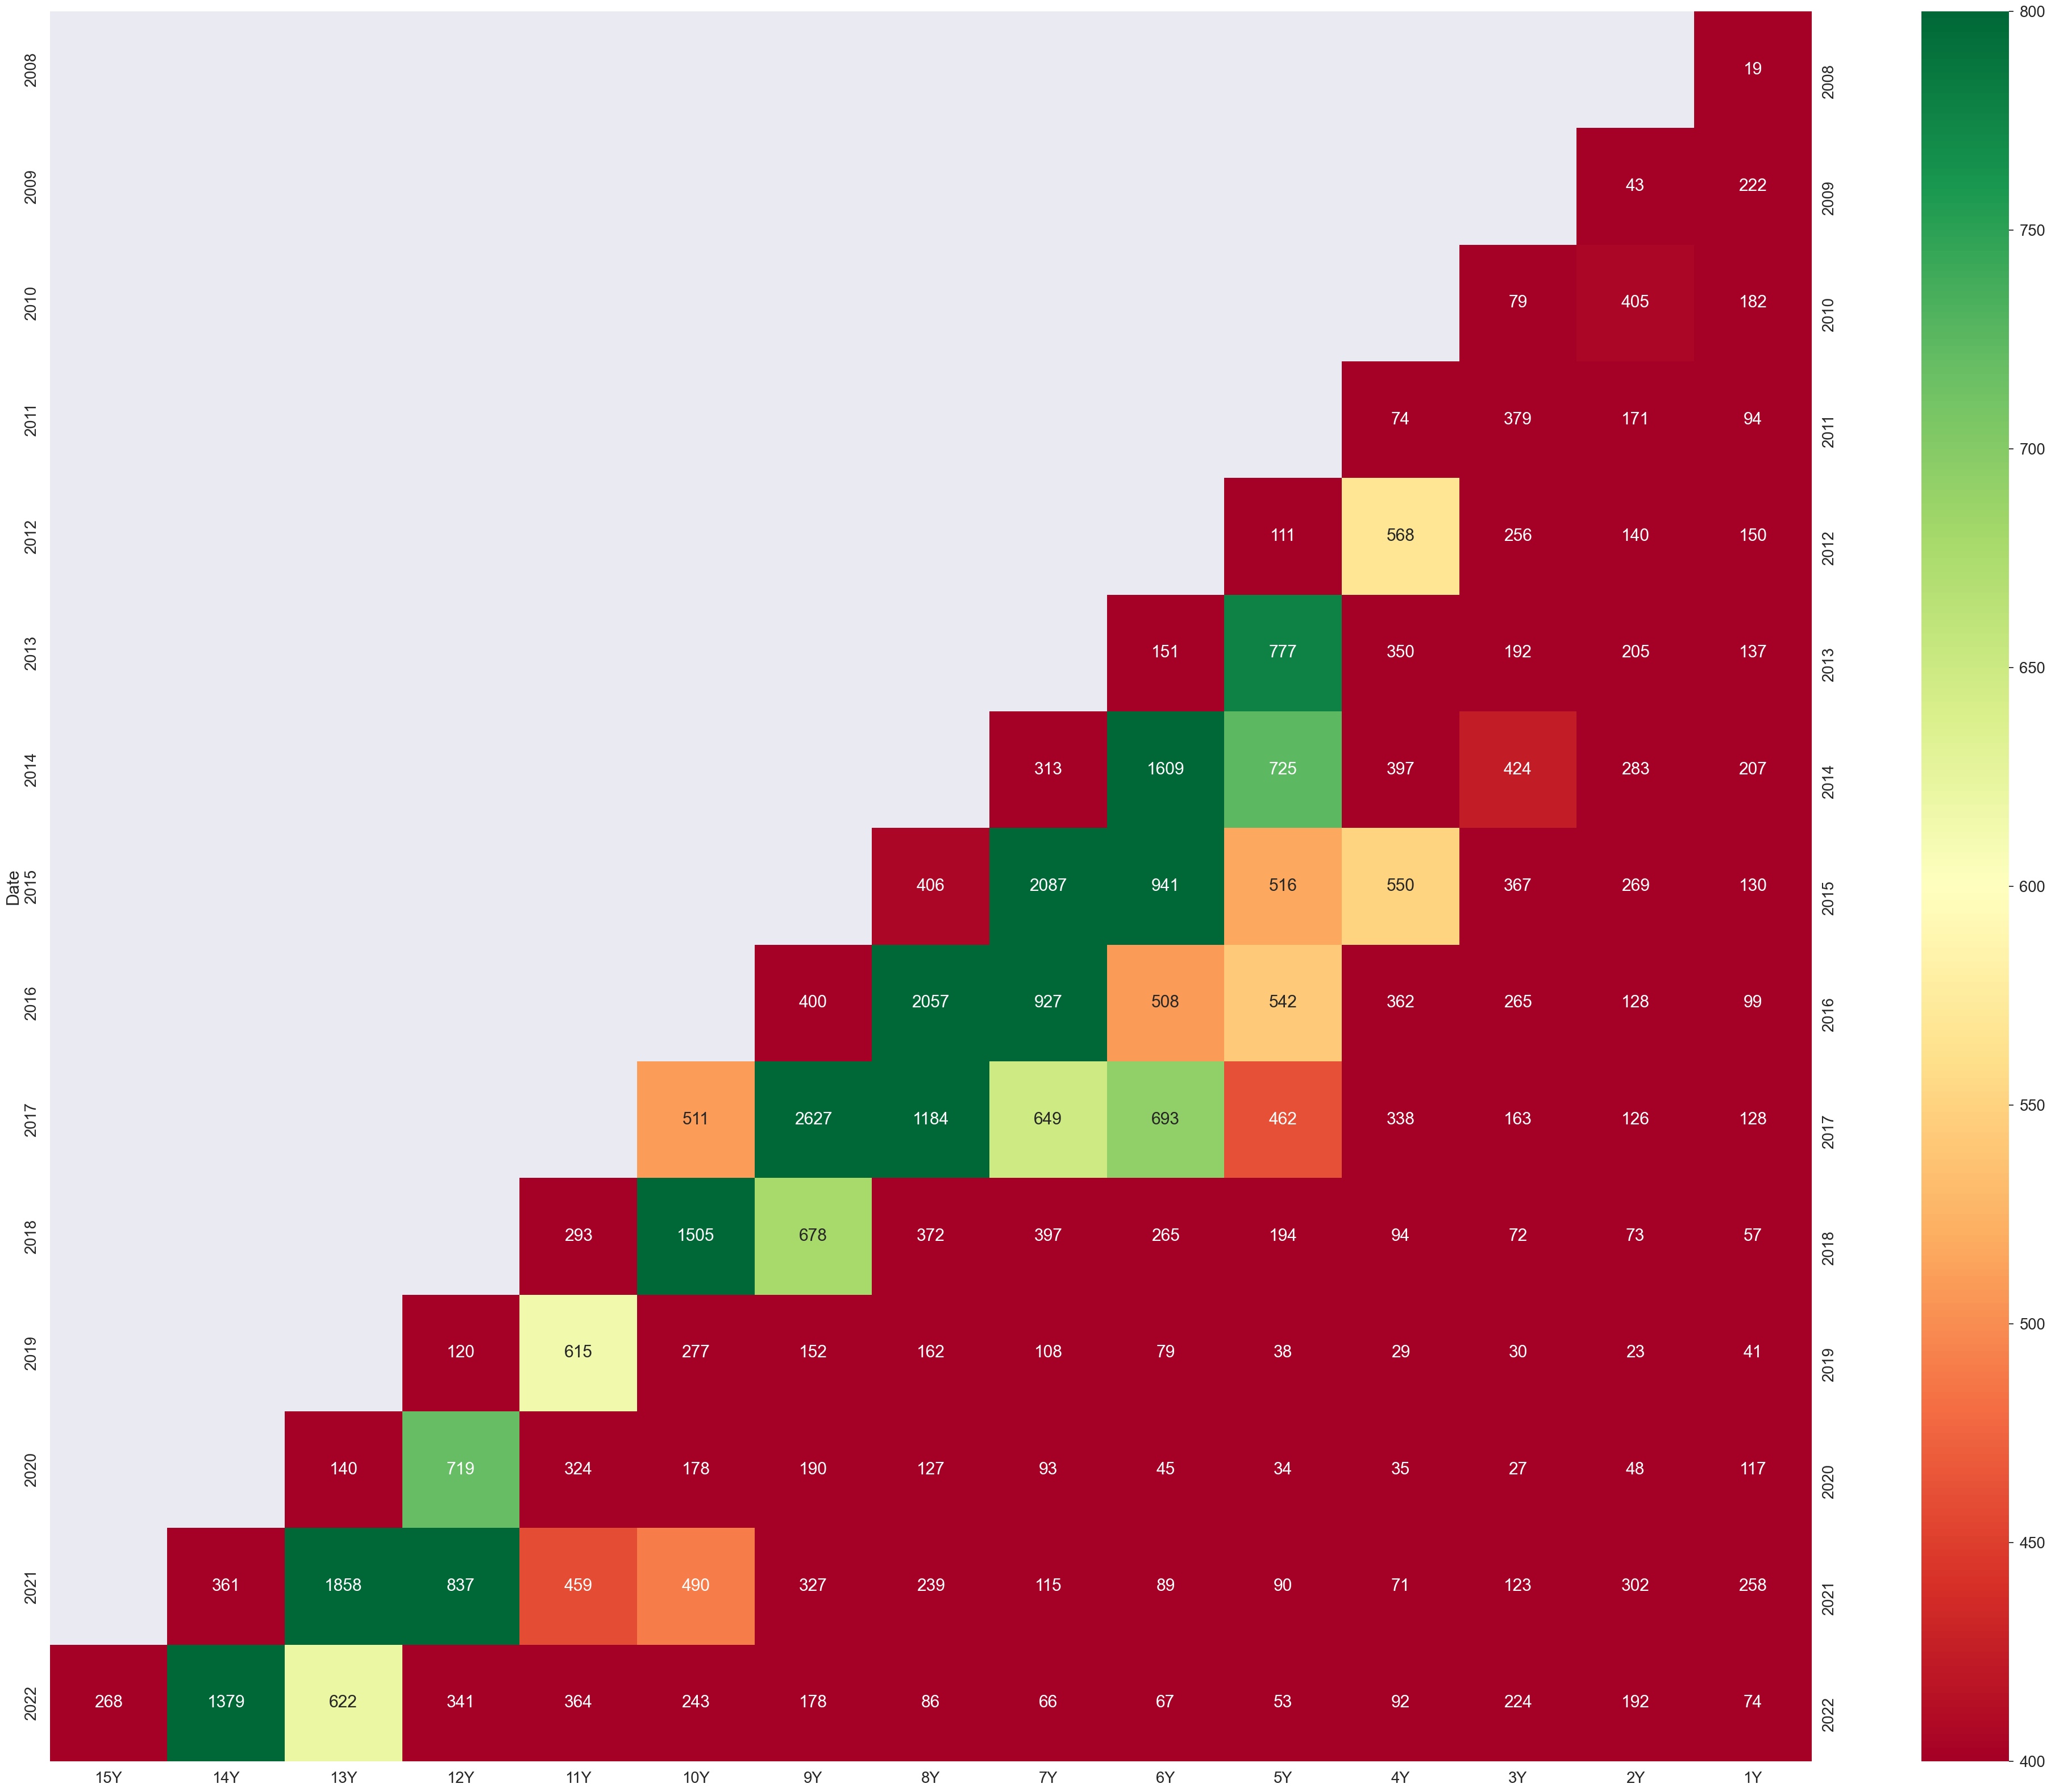

In [44]:
plt.figure(figsize=(50,40))
sns.set(font_scale = 1.8)
sns.heatmap(triangle, annot= True, cmap = "RdYlGn", vmin= 400, vmax=800, center = 600, fmt=".0f") 
plt.tick_params(axis = "y", labelright = True)
plt.show()